# Machine Learning Homework 5 - Final Project

### Submission By:  
<ul>
    <li>Akshay Prakash Tambe (apt321@nyu.edu)</li>
    <li>Snahil Singh (ss11381@nyu.edu)</li>
</ul>

In [214]:
# Import Packages
import pandas as pd
import numpy as np

In [215]:
# Loading Comma Seperated Data using read_table pandas function in 'census_train_data' dataframe
census_train_data = pd.read_csv("census_train.csv", header=None)
census_train_data = pd.DataFrame(census_train_data)
# Adding Headers to Data
census_train_data.columns = ["idnum", "age", "workerclass", "interestincome", "traveltimetowork",\
                             "vehicleoccupancy", "meansoftransport", "marital", "schoolenrollment",\
                             "educationalattain", "sex", "workarrivaltime", "hoursworkperweek", "ancestry",\
                             "degreefield", "industryworkedin", "wages"]


# Loading Comma Seperated Data using read_table pandas function in 'reviews_test_data' dataframe
census_test_data = pd.read_csv("census_test.csv", header=None)
census_test_data = pd.DataFrame(census_test_data)
census_test_data.columns = ["idnum", "age", "workerclass", "interestincome", "traveltimetowork",\
                             "vehicleoccupancy", "meansoftransport", "marital", "schoolenrollment",\
                             "educationalattain", "sex", "workarrivaltime", "hoursworkperweek", "ancestry",\
                             "degreefield", "industryworkedin"]

In [218]:
census_test_data

,idnum,age,workerclass,interestincome,traveltimetowork,vehicleoccupancy,meansoftransport,marital,schoolenrollment,educationalattain,sex,workarrivaltime,hoursworkperweek,ancestry,degreefield,industryworkedin
0,1405,62,1,20,?,?,?,2,1,18,2,?,?,32,?,4970
1,1406,61,1,0,30,1,1,2,1,18,2,112,40,51,?,7070
2,1407,38,4,0,15,1,1,1,1,24,1,101,40,148,3700,7870
3,1408,19,?,0,?,?,?,5,3,15,2,?,?,929,?,?
4,1410,37,1,0,35,?,2,1,1,21,2,119,42,720,6109,7970
5,1411,59,1,0,90,1,1,3,1,16,1,271,40,32,?,3960
6,1412,17,?,0,?,?,?,5,2,15,1,?,?,275,?,?
7,1413,36,1,0,10,1,1,3,1,20,2,99,40,32,?,8190
8,1414,26,?,0,?,?,?,5,1,17,1,?,?,148,?,?
9,1415,26,?,0,?,?,?,5,1,17,1,?,?,148,?,?


# Data Cleaning

<div style="color:blue">
No Missing Values Found in:  
- idnum  
- age  
- interestincome  
- marital  
- sex  
- ancestry  
- wages
</div>

In [143]:
# Cleaning workerclass -  Filling it with zero's (New Category) as the description represents a different class from others
census_train_data['workerclass'] = census_train_data['workerclass'].replace('?', 0)
census_test_data['workerclass'] = census_test_data['workerclass'].replace('?', 0)

# Cleaning traveltimetowork - Filling it with zero's (New Category) as worker who works from home will never travel, 
# Same applies to a worker who never worked.
census_train_data['traveltimetowork'] = census_train_data['traveltimetowork'].replace('?', 0)
census_test_data['traveltimetowork'] = census_test_data['traveltimetowork'].replace('?', 0)

# ******Cleaning vehicleoccupancy - Filling it with zero's (New Category) for now*******
census_train_data['vehicleoccupancy'] = census_train_data['vehicleoccupancy'].replace('?', 0)
census_test_data['vehicleoccupancy'] = census_test_data['vehicleoccupancy'].replace('?', 0)

# Cleaning meansoftransport - Filling it with zero's (New Category) as non-worked is assumed that he/she will not travel to work
census_train_data['meansoftransport'] = census_train_data['meansoftransport'].replace('?', 0)
census_test_data['meansoftransport'] = census_test_data['meansoftransport'].replace('?', 0)

# Cleaning schoolenrollment - Filling it with zero's (New Category) as the least age for enrollment is atleast 5 Years
# 0 - No, less than 3 years
census_train_data['schoolenrollment'] = census_train_data['schoolenrollment'].replace('?', 0)
census_test_data['schoolenrollment'] = census_test_data['schoolenrollment'].replace('?', 0)

# Cleaning educationalattain - Filling it with zero's (New Category) as the least age for enrollment is atleast 5 Years
# 1 - No Education Attainment, less than 3 years
census_train_data['educationalattain'] = census_train_data['educationalattain'].replace('?', 1)
census_test_data['educationalattain'] = census_test_data['educationalattain'].replace('?', 1)

# Cleaning meansoftransport - Filling it with zero's (New Category) as non-worked is assumed that he/she will not travel to work
census_train_data['workarrivaltime'] = census_train_data['workarrivaltime'].replace('?', 0)
census_test_data['workarrivaltime'] = census_test_data['workarrivaltime'].replace('?', 0)

# Cleaning hoursworkperweek - Filling it with zero's (New Category) for non-worker
census_train_data['hoursworkperweek'] = census_train_data['hoursworkperweek'].replace('?', 0)
census_test_data['hoursworkperweek'] = census_test_data['hoursworkperweek'].replace('?', 0)

# Cleaning degreefield - Filling it with 1111 (New Category) for unknown degree
# 1000, less than bachelor's degree (Related to educationattain)
census_train_data['degreefield'] = census_train_data['degreefield'].replace('?', 1000)
census_test_data['degreefield'] = census_test_data['degreefield'].replace('?', 1000)

# Cleaning industryworkedin - Filling it with 1111 (New Category) for unknown degree
# 100, less than 16 years old/not in labor force who last worked more than 5 years ago or never worked
census_train_data['industryworkedin'] = census_train_data['industryworkedin'].replace('?', 100)
census_test_data['industryworkedin'] = census_test_data['industryworkedin'].replace('?', 100)

census_train_data.head()

,idnum,age,workerclass,interestincome,traveltimetowork,vehicleoccupancy,meansoftransport,marital,schoolenrollment,educationalattain,sex,workarrivaltime,hoursworkperweek,ancestry,degreefield,industryworkedin,wages
0,0,58,3,0,40,2,1,1,1,22,1,84,40,32,2300,7870,110000
1,1,34,3,0,10,1,1,5,1,16,1,168,40,51,1000,7860,34500
2,2,57,2,0,15,8,1,5,1,16,1,100,30,51,1000,8390,4700
3,3,17,0,0,0,0,0,5,2,15,2,0,0,714,1000,100,0
4,4,42,1,0,20,1,1,1,1,22,1,92,45,21,5001,6990,120000


## Feature Engineering

Features Dropped:
- idnum

In [144]:
# Taking only the features that is important for now
X = census_train_data[['age', 'workerclass', 'interestincome', 'traveltimetowork', 'vehicleoccupancy',\
                       'meansoftransport', 'marital', 'schoolenrollment', 'educationalattain', 'sex', \
                       'workarrivaltime', 'hoursworkperweek', 'ancestry','degreefield', 'industryworkedin']]
# Taking the labels (Income)
y = census_train_data['wages']

In [145]:
"""def onehotencoding(data):
    categoricalcols = ['age', 'workerclass', 'interestincome', 'traveltimetowork', 'vehicleoccupancy',\
                       'meansoftransport', 'marital', 'schoolenrollment', 'educationalattain', 'sex', \
                       'workarrivaltime', 'hoursworkperweek', 'ancestry','degreefield', 'industryworkedin']
    for x in categoricalcols:
        values = list(data[x].unique())
        for y in values:
            data[y] = '0'
            data.loc[(data[x] == y), y] = '1' 
        data = data.drop(x,axis =1)
    return data"""

"def onehotencoding(data):\n    categoricalcols = ['age', 'workerclass', 'interestincome', 'traveltimetowork', 'vehicleoccupancy',                       'meansoftransport', 'marital', 'schoolenrollment', 'educationalattain', 'sex',                        'workarrivaltime', 'hoursworkperweek', 'ancestry','degreefield', 'industryworkedin']\n    for x in categoricalcols:\n        values = list(data[x].unique())\n        for y in values:\n            data[y] = '0'\n            data.loc[(data[x] == y), y] = '1' \n        data = data.drop(x,axis =1)\n    return data"

In [146]:
# X = onehotencoding(X)

In [147]:
X.head(10)

,age,workerclass,interestincome,traveltimetowork,vehicleoccupancy,meansoftransport,marital,schoolenrollment,educationalattain,sex,workarrivaltime,hoursworkperweek,ancestry,degreefield,industryworkedin
0,58,3,0,40,2,1,1,1,22,1,84,40,32,2300,7870
1,34,3,0,10,1,1,5,1,16,1,168,40,51,1000,7860
2,57,2,0,15,8,1,5,1,16,1,100,30,51,1000,8390
3,17,0,0,0,0,0,5,2,15,2,0,0,714,1000,100
4,42,1,0,20,1,1,1,1,22,1,92,45,21,5001,6990
5,18,0,0,0,0,0,5,2,15,2,0,0,999,1000,100
6,67,1,9500,0,0,0,1,1,21,1,0,3,142,2405,7390
7,21,2,0,0,0,0,5,3,16,2,0,0,50,1000,8590
8,18,1,0,5,0,12,5,3,19,2,105,10,84,1000,4970
9,43,2,0,50,0,4,5,1,16,1,68,24,335,1000,9180


In [148]:
cols = X.columns.values

In [149]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler_x = scaler.fit(X)
scaler_y = scaler.fit(y.reshape(-1, 1))

scaled_train = scaler_x.transform(X)
scaled_y = scaler_y.transform(y.reshape(-1, 1))

scaled_train = pd.DataFrame(scaled_train, columns=cols)
scaled_y = pd.DataFrame(y, columns = ["wages"])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [150]:
scaled_train.describe()

,age,workerclass,interestincome,traveltimetowork,vehicleoccupancy,meansoftransport,marital,schoolenrollment,educationalattain,sex,workarrivaltime,hoursworkperweek,ancestry,degreefield,industryworkedin
count,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000
mean,-0.176082,-0.177051,-0.114718,-0.176733,-0.177075,-0.177051,-0.177026,-0.177059,-0.176696,-0.177051,-0.175937,-0.176600,-0.167937,-0.130330,-0.079877
std,0.000418,0.000040,0.505076,0.000515,0.000013,0.000057,0.000038,0.000010,0.000056,0.000010,0.001268,0.000440,0.008410,0.040502,0.076139
min,-0.176771,-0.177083,-0.206250,-0.177083,-0.177083,-0.177083,-0.177063,-0.177063,-0.176771,-0.177063,-0.177083,-0.177083,-0.177021,-0.156250,-0.175000
25%,-0.176437,-0.177083,-0.177083,-0.177083,-0.177083,-0.177083,-0.177063,-0.177063,-0.176750,-0.177063,-0.177083,-0.177083,-0.176021,-0.156250,-0.175000
50%,-0.176104,-0.177063,-0.177083,-0.177010,-0.177083,-0.177063,-0.177042,-0.177063,-0.176687,-0.177042,-0.175937,-0.176458,-0.171646,-0.156250,-0.048333
75%,-0.175771,-0.177042,-0.177083,-0.176458,-0.177063,-0.177063,-0.176979,-0.177063,-0.176646,-0.177042,-0.175042,-0.176250,-0.157896,-0.108313,-0.013073
max,-0.175104,-0.176896,6.677083,-0.174208,-0.176917,-0.176833,-0.176979,-0.177021,-0.176583,-0.177042,-0.171208,-0.175021,-0.156271,-0.043708,0.029583


In [151]:
### Plotting function for Information Gain of each feature

def plot_info(res, title):
    
    feat = res.keys()
    imp = res.values()
    # Plotting Feature_Names on X-Axis and Feature_importances on Y-Axis
    plt.figure(figsize=(12, 8))
    plt.bar(range(len(feat)), imp)
    plt.xticks(range(len(feat)), feat, rotation=40)
    plt.xlabel('Feature Name')
    plt.ylabel('Feature Importance')
    plt.title(title)
    plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


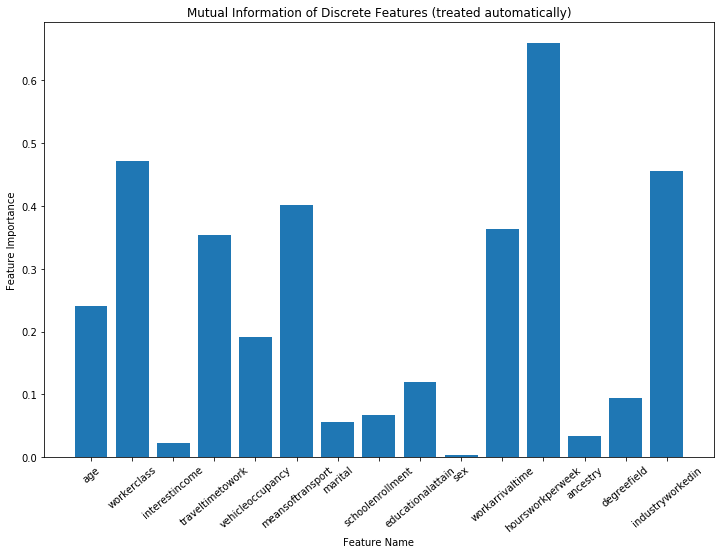

In [152]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

discrete_feat = ['age', 'workerclass', 'interestincome', 'traveltimetowork', 'vehicleoccupancy',\
                       'meansoftransport', 'marital', 'schoolenrollment', 'educationalattain', 'sex', \
                       'workarrivaltime', 'hoursworkperweek', 'ancestry','degreefield', 'industryworkedin']
dis_mutual_info = mutual_info_regression(scaled_train[discrete_feat], y, copy = True)

dis_res = dict(zip(discrete_feat, dis_mutual_info))
plot_info(dis_res, "Mutual Information of Discrete Features (treated automatically)")

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


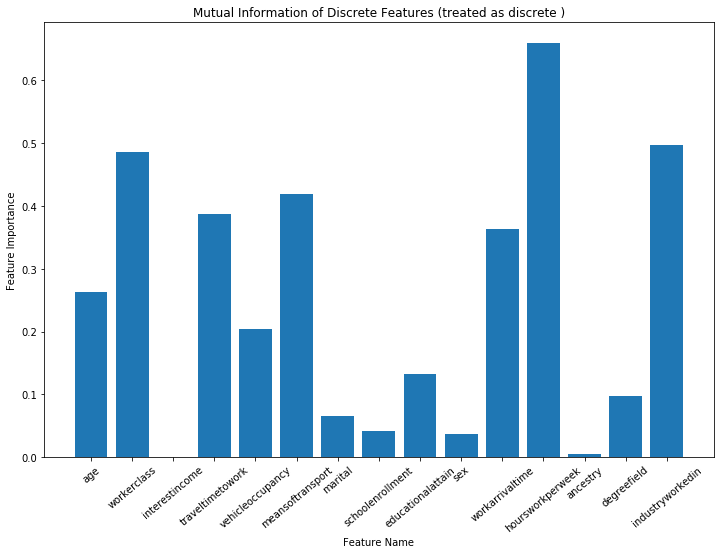

In [153]:
dis_mutual_info = mutual_info_regression(scaled_train[discrete_feat], y,   discrete_features = True, copy = True)

dis_res = dict(zip(discrete_feat, dis_mutual_info))
plot_info(dis_res, "Mutual Information of Discrete Features (treated as discrete )")

In [154]:
from sklearn.feature_selection import SelectKBest

kbest = SelectKBest(mutual_info_regression, k=5)
kbest.fit(scaled_train, y)
kbest.get_support(indices=True)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([ 1,  5, 10, 11, 14])

In [155]:
i = 0
for col in scaled_train:
    print(i, col)
    i += 1

0 age
1 workerclass
2 interestincome
3 traveltimetowork
4 vehicleoccupancy
5 meansoftransport
6 marital
7 schoolenrollment
8 educationalattain
9 sex
10 workarrivaltime
11 hoursworkperweek
12 ancestry
13 degreefield
14 industryworkedin


In [156]:
bad_feat = ['marital', 'sex', 'ancestry']
trimmed_train = scaled_train.drop(bad_feat, axis=1)
trimmed_train.head()

,age,workerclass,interestincome,traveltimetowork,vehicleoccupancy,meansoftransport,schoolenrollment,educationalattain,workarrivaltime,hoursworkperweek,degreefield,industryworkedin
0,-0.175875,-0.177021,-0.177083,-0.176250,-0.177042,-0.177063,-0.177063,-0.176625,-0.175333,-0.176250,-0.129167,-0.013125
1,-0.176375,-0.177021,-0.177083,-0.176875,-0.177063,-0.177063,-0.177063,-0.176750,-0.173583,-0.176250,-0.156250,-0.013333
2,-0.175896,-0.177042,-0.177083,-0.176771,-0.176917,-0.177063,-0.177063,-0.176750,-0.175000,-0.176458,-0.156250,-0.002292
3,-0.176729,-0.177083,-0.177083,-0.177083,-0.177083,-0.177083,-0.177042,-0.176771,-0.177083,-0.177083,-0.156250,-0.175000
4,-0.176208,-0.177063,-0.177083,-0.176667,-0.177063,-0.177063,-0.177063,-0.176625,-0.175167,-0.176146,-0.072896,-0.031458


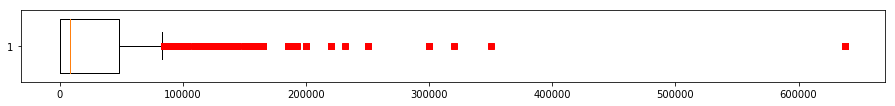

In [157]:
# Taking only the features that is important for now
X = census_train_data[['age', 'workerclass', 'interestincome', 'traveltimetowork', 'vehicleoccupancy', \
                       'meansoftransport', 'educationalattain', \
                       'workarrivaltime', 'hoursworkperweek', 'degreefield', 'industryworkedin']]
# Taking the labels (Income)
y = census_train_data['wages']
#y = (y - y.mean())/(y.max()-y.min())
y.quantile([0.33, 0.67])

figure = plt.figure(figsize=(15, 5))
axes = figure.add_subplot(1, 1, 1)
axes.boxplot(y, 0, 'rs', 0, 0.75, widths=[0.75])
plt.subplots_adjust(left=0.1, right=0.9, top=0.6, bottom=0.4)
plt.show()

In [158]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
data = census_train_data[['age', 'workerclass', 'interestincome', 'traveltimetowork', 'vehicleoccupancy', \
                       'meansoftransport', 'educationalattain', \
                       'workarrivaltime', 'hoursworkperweek', 'degreefield', 'industryworkedin', 'wages']]
standardScalerX = StandardScaler()
transformed_data = standardScalerX.fit_transform(data)
transformed_data_df = pd.DataFrame(transformed_data)
transformed_data_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.494221,0.768232,-0.123529,0.938631,2.670164,-0.199400,1.250807,0.476199,0.794753,0.028730,0.877081,0.994226
1,-0.702318,0.768232,-0.123529,-0.275903,1.015808,-0.199400,-0.964534,1.856942,0.794753,-0.640236,0.874343,-0.017235
2,0.444365,0.244879,-0.123529,-0.073481,12.596299,-0.199400,-0.964534,0.739198,0.321252,-0.640236,1.019425,-0.416461
3,-1.549866,-0.801825,-0.123529,-0.680748,-0.638548,-0.567715,-1.333758,-0.904544,-1.099248,-0.640236,-1.249864,-0.479426
4,-0.303472,-0.278473,-0.123529,0.128942,1.015808,-0.199400,1.250807,0.607698,1.031503,1.418636,0.636191,1.128194
5,-1.500010,-0.801825,-0.123529,-0.680748,-0.638548,-0.567715,-1.333758,-0.904544,-1.099248,-0.640236,-1.249864,-0.479426
6,0.942923,-0.278473,0.268492,-0.680748,-0.638548,-0.567715,0.881584,-0.904544,-0.957198,0.082762,0.745686,-0.425839
7,-1.350443,0.244879,-0.123529,-0.680748,-0.638548,-0.567715,-0.964534,-0.904544,-1.099248,-0.640236,1.074172,-0.479426
8,-1.500010,-0.278473,-0.123529,-0.478326,-0.638548,3.852063,0.143137,0.821385,-0.625748,-0.640236,0.083240,-0.464690
9,-0.253616,0.244879,-0.123529,1.343476,-0.638548,0.905544,-0.964534,0.213200,0.037152,-0.640236,1.235678,0.163622


In [199]:
# Feature Scaling
from sklearn.preprocessing import scale
data = census_train_data[['age', 'workerclass', 'interestincome', 'traveltimetowork', 'vehicleoccupancy', \
                       'meansoftransport', 'educationalattain', \
                       'workarrivaltime', 'hoursworkperweek', 'degreefield', 'industryworkedin']]
transformed_data = scale(data)
transformed_data_df = pd.DataFrame(transformed_data)
transformed_data_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.494221,0.768232,-0.123529,0.938631,2.670164,-0.199400,1.250807,0.476199,0.794753,0.028730,0.877081
1,-0.702318,0.768232,-0.123529,-0.275903,1.015808,-0.199400,-0.964534,1.856942,0.794753,-0.640236,0.874343
2,0.444365,0.244879,-0.123529,-0.073481,12.596299,-0.199400,-0.964534,0.739198,0.321252,-0.640236,1.019425
3,-1.549866,-0.801825,-0.123529,-0.680748,-0.638548,-0.567715,-1.333758,-0.904544,-1.099248,-0.640236,-1.249864
4,-0.303472,-0.278473,-0.123529,0.128942,1.015808,-0.199400,1.250807,0.607698,1.031503,1.418636,0.636191
5,-1.500010,-0.801825,-0.123529,-0.680748,-0.638548,-0.567715,-1.333758,-0.904544,-1.099248,-0.640236,-1.249864
6,0.942923,-0.278473,0.268492,-0.680748,-0.638548,-0.567715,0.881584,-0.904544,-0.957198,0.082762,0.745686
7,-1.350443,0.244879,-0.123529,-0.680748,-0.638548,-0.567715,-0.964534,-0.904544,-1.099248,-0.640236,1.074172
8,-1.500010,-0.278473,-0.123529,-0.478326,-0.638548,3.852063,0.143137,0.821385,-0.625748,-0.640236,0.083240
9,-0.253616,0.244879,-0.123529,1.343476,-0.638548,0.905544,-0.964534,0.213200,0.037152,-0.640236,1.235678


In [201]:
y = census_train_data['wages']

In [202]:
from sklearn.linear_model import LinearRegression

y = census_train_data['wages']
x_train, x_test, y_train, y_test = np.array(train_test_split(transformed_data_df, y, train_size = 0.7))

LR_model = LinearRegression()
LR_model.fit(x_train, y_train)
preds = LR_model.predict(x_test)
MSE = mse(y_test, preds)
print(MSE)

2521265444.8105903


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [212]:
import numpy
preds = numpy.around(preds, decimals=0, out=None)
preds[preds < 0] = 0
preds.astype(int)

array([ 22025,      0,  93283,  43943,  81254,  15251,      0,      0,
        59683, 117547,  77605,      0,  74128,  47217,  66233,  44642,
            0,  26521,  16452,      0,  21097,  76844,      0,      0,
        74268,  97885,  38666,  61941,  58024,  34636,  92628,  51288,
        67023,  74813,      0,      0,  15713,  36350, 104891,  41611,
        41435,   8820,  94870,      0,  76585,   1106,      0,  19546,
        10948,      0, 103203,  57975,  87871,  29719,  74646,  53173,
            0,  84252, 117996,  25726,  24678,  57970, 134944,  11580,
            0,      0,  86053,      0,  68168,  62621,  65283,  50373,
        24121,  20658,  33713,  97756,  41736,  98898,  79935,  40447,
            0,      0,      0,  44004,  59725,      0,  39558,      0,
            0,  67211,      0,  88101,      0,  94058,      0, 122857,
       113249,  54873,  65880,      0,  89147,  38140,      0,      0,
        81111,      0,  19026,      0,      0, 101798,      0,  62097,
      

In [213]:
mse(y_test, preds)

2440672002.800562

In [206]:
print(y_test[0:10])
print(preds[0:10])

479          0
963          0
138      85000
101          0
936     140000
300          0
562          0
67           0
751       3000
1161    110000
Name: wages, dtype: int64
[ 22025.20322856 -21438.98581641  93283.23471131  43943.41607082
  81254.14924549  15250.71478468  -6675.28854276  -5621.65753554
  59682.76794839 117547.10400789]


In [136]:
X = transformed_data_df.iloc[:, :-1].values
y = transformed_data_df.iloc[:, :-11].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

y_train = np.array(y_train)
mean = y_train.mean()
preds = []

for i in range(len(y_test)):
    
    preds.append(mean)
    
print("Mean Squared Error:" + str(mse(y_test, preds)))

Mean Squared Error:1.1017423545350222


In [137]:
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7))

LR_model = LinearRegression()
LR_model.fit(x_train, y_train)
preds = LR_model.predict(x_test)
MSE = mse(y_test, preds)
print(MSE)

1.190239453990996e-30


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [178]:
import numpy
preds = numpy.around(preds, decimals=0, out=None)
np.mean(y_test == preds)

1.0

In [139]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
y = census_train_data['wages']
# 20% split to test set as it will be used in the very end
x_train, x_test, y_train, y_test = np.array(train_test_split(scaled_train, y, train_size = 0.7))

y_train = np.array(y_train)
mean = y_train.mean()
preds = []

for i in range(len(y_test)):
    
    preds.append(mean)
    
print("Mean Squared Error:" + str(mse(y_test, preds)))

Mean Squared Error:4123142412.2963605


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [35]:
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7))

LR_model = LinearRegression()
LR_model.fit(x_train, y_train)
preds = LR_model.predict(x_test)
MSE = mse(y_test, preds)
print(MSE)

0.011745199773481317


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [27]:
preds[0]

-0.012317911769858733

In [50]:
y

0       110000
1        34500
2         4700
3            0
4       120000
5            0
6         4000
7            0
8         1100
9        48000
10           0
11       36200
12        5000
13           0
14       40000
15      120000
16           0
17           0
18      100000
19           0
20       25000
21       55000
22       40000
23           0
24           0
25           0
26         150
27       46300
28       21000
29        8000
         ...  
1154    300000
1155     14000
1156         0
1157     50000
1158         0
1159    118000
1160         0
1161    110000
1162         0
1163         0
1164     42000
1165      9000
1166         0
1167      8500
1168     25000
1169     74000
1170         0
1171         0
1172         0
1173         0
1174         0
1175         0
1176     12000
1177     80000
1178     11400
1179    100000
1180         0
1181         0
1182     22000
1183    150000
Name: wages, Length: 1184, dtype: int64

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [124]:
# Convert to numpy arrays
X_PCA = X.values

# Fit and Transform
scaler = StandardScaler()
scaler.fit(X_PCA)
X_scaled_tranform = scaler.transform(X_PCA)
pca = PCA(n_components=12)
pca.fit(X_scaled_tranform)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0.5,1,'PCA Components with Explained Variance')

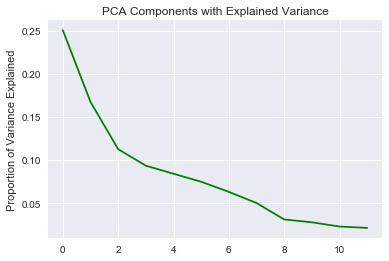

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
# Explained Variance
variance = pca.explained_variance_ratio_

# Plotting PCA Components with Explained Variance
plt.plot(variance, color='g')
plt.ylabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('PCA Components with Explained Variance')

In [126]:
# Perform PCA for 20 Components
pca = PCA(n_components=12)
X1 = pca.fit_transform(X_scaled_tranform)
print ("Variance explained by first 10 factors = %s" \
       % (pca.explained_variance_ratio_[0:9].sum()/pca.explained_variance_ratio_.sum()))

Variance explained by first 10 factors = 0.9279146936850716


In [127]:
# Factor Loading
# Selecting the top 10 factors in terms of explained variance
pca_factors = pd.DataFrame(pca.components_, columns=X.columns)
pca_factors = pca_factors.loc[0:9]
pca

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [128]:
# Important factors with higher weightage
latent_factors = list(set(pd.DataFrame(pca_factors.max())[pd.DataFrame(pca_factors.max()> 0.2)[0]].index)\
                  .union(set(pd.DataFrame(pca_factors.min())[pd.DataFrame(pca_factors.min()< -0.2)[0]].index)))
pd.DataFrame(latent_factors)

,0
0,hoursworkperweek
1,industryworkedin
2,workerclass
3,degreefield
4,educationalattain
5,meansoftransport
6,ancestry
7,age
8,vehicleoccupancy
9,marital


In [129]:
pca_factors_subset = pca_factors[latent_factors]
pca_factors_subset.head()

,hoursworkperweek,industryworkedin,workerclass,degreefield,educationalattain,meansoftransport,ancestry,age,vehicleoccupancy,marital,schoolenrollment,sex
0,0.468274,0.469793,0.363879,0.304033,0.377908,0.270700,-0.058021,-0.149628,0.283338,-0.044471,-0.093334,-0.048504
1,0.047389,0.118830,0.001120,-0.142647,-0.148792,0.116286,0.212664,-0.582241,-0.058235,0.544659,0.492228,-0.032551
2,0.227135,0.144212,0.219626,-0.602225,-0.497377,-0.057259,0.021593,0.061614,0.392100,-0.118920,-0.144856,-0.270016
3,-0.048995,0.040883,-0.094782,0.082430,0.118238,-0.681336,-0.217919,-0.119228,0.557866,0.027161,0.223243,0.280103
4,-0.069090,-0.114404,0.016268,0.086774,0.077896,-0.065751,-0.619995,-0.085243,-0.080614,0.008455,0.198627,-0.725444


[]

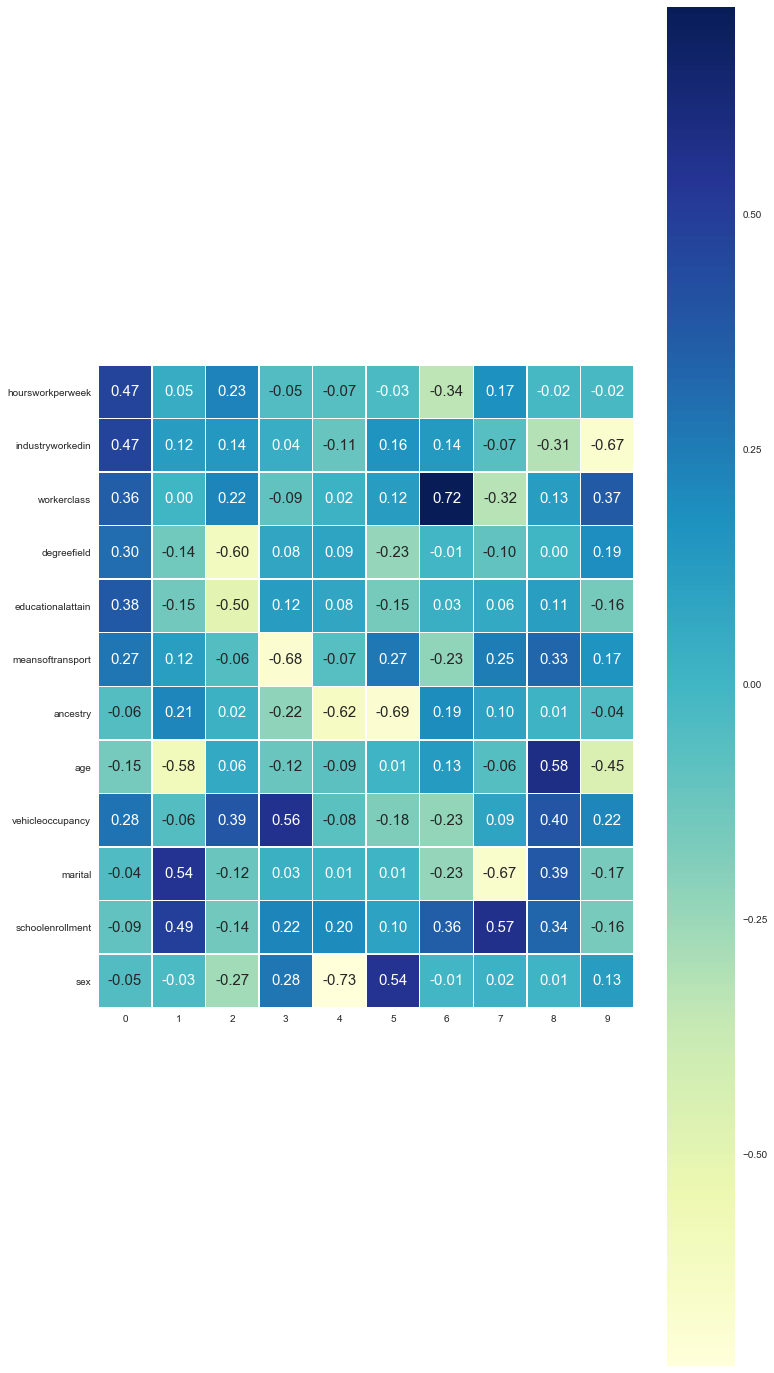

In [130]:
# Heatmap
import seaborn as sns
sns.set(rc={'figure.figsize':(12,25)})
sns.heatmap(pca_factors_subset.T, cmap='YlGnBu', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, linewidths=0.5)
plt.plot()

In [102]:
from sklearn.model_selection import train_test_split
"""
# Taking only the features that is important for now
X = census_train_data[['age', 'workerclass', 'vehicleoccupancy',\
                       'meansoftransport', 'marital', 'schoolenrollment', 'educationalattain', 'sex', 'hoursworkperweek', \
                       'degreefield', 'industryworkedin']]

# Taking the labels (Income)
Y = census_train_data['wages']
"""
# Spliting into 70% for training set and 30% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [77]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.4803370786516854


In [70]:
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [71]:
best_params = svc_param_selection(X_train, Y_train, 5)
best_params

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'C': 1, 'gamma': 0.1}

In [81]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC(kernel='rbf', C=1, gamma=0.1)

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.4803370786516854


In [66]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn import metrics

clf_tree = DecisionTreeClassifier(max_depth = 4)
clf_tree.fit(X_train, Y_train)

tree_predict = clf_tree.predict(x_test)
metrics.accuracy_score(y_test, tree_predict)

0.47191011235955055